In [24]:
# Import OTF data pre-processing library and pandas
import OTF_data_processing_functions as otf
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Extraction
print("## Extracting Contacts")

## Extracting Contacts


In [3]:
api_key = "pat-na1-3c7b0af9-bb66-40e7-a256-ce4c5eb27e81"
contacts = otf.contact_collection(api_key)

print(f"Total Contacts: {len(contacts)}")

Starting contact collection...
Making API request to https://api.hubapi.com/crm/v3/objects/contacts/search
Collected 6936 contacts.
Total requests: 70
Total execution time: 37.23219299316406 seconds
Total Contacts: 6936


In [4]:
# Show an exaxmple of extracted contacts
print(contacts[0])

{'id': '416102', 'properties': {'address': 'Blackpool  Rue, 6576', 'country': 'Waterford', 'createdate': '2023-05-15T02:39:02.002Z', 'hs_object_id': '416102', 'industry': 'Poultry and fish', 'lastmodifieddate': '2023-09-16T10:56:44.913Z', 'phone': '0-774-386-624', 'raw_email': 'Zoe <zoe_owen450104633@acrit.org> Contact Info.', 'technical_test___create_date': '2021-07-13'}, 'createdAt': '2023-05-15T02:39:02.002Z', 'updatedAt': '2023-09-16T10:56:44.913Z', 'archived': False}


In [5]:
# Transformation
print("## Transforming Contacts")

## Transforming Contacts


In [6]:
# Manage duplicates
managed_duplicates_data = otf.manage_duplicates(contacts)

In [7]:
# Country recognition
contact_id = '416102'
country_city = otf.country_recognition(contact_id, managed_duplicates_data)
print(country_city)

('Ireland', 'Waterford')


In [8]:
# Found email
found_email  = otf.found_emails(contact_id, managed_duplicates_data)
print(found_email)

zoe_owen450104633@acrit.org


In [9]:
# Fix the phone number adding country code
fixed_number = otf.fix_phone_numbers(contact_id, managed_duplicates_data)
print(fixed_number)

(\+353) 77 438 6624


Ireland: 3131
United Kingdom: 2926


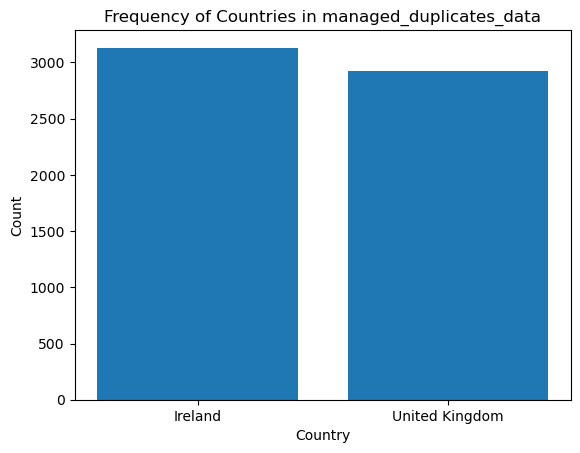

In [26]:
# Plotting histogram of country frequency
# Extract the country for each contact in managed_duplicates_data
countries = [contact["properties"]["Country"] for contact in managed_duplicates_data if "Country" in contact["properties"]]

# Count the frequency of each country
country_counts = Counter(countries)

# Print the frequency of each country
for country, count in country_counts.items():
    print(f"{country}: {count}")
    
# Create a bar chart of the country counts
plt.bar(country_counts.keys(), country_counts.values())

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Frequency of Countries in managed_duplicates_data')

# Display the chart
plt.show()

In [ ]:
# Transform data adding new properties and saving contacts

transformed_contacts = otf.saving_contacts(managed_duplicates_data)
print(len(transformed_contacts))

In [ ]:
# Transform data adding new properties and saving contacts

transformed_contacts = otf.saving_contacts(managed_duplicates_data)
print(len(transformed_contacts))

# Show an example of transformed contact
print([0])

In [ ]:
# Plotting histogram of country frequency
countries = [c['Country'] for c in transformed_contacts if 'Country' in c]
df = pd.DataFrame(countries, columns=['Country'])
df['Country'].value_counts().plot.bar()